In [1]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB
os.chdir("../../../../")

In [3]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None
value = "1000"

In [4]:
y_data_style = "h1n1"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=value,
    sampling=sampling
    )

Hay 13354 filas y 13354 no tienen NaN
Hay 26708 filas y 26708 no tienen NaN


In [10]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [11]:
f_selector = SFS(
    CategoricalNB(),
    k_features=x_data.shape[1], 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='roc_auc',
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.3s finished

[2022-01-12 22:13:42] Features: 1/35 -- score: 0.7144565597709986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    6.1s finished

[2022-01-12 22:13:48] Features: 2/35 -- score: 0.772664246201695[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    5.5s finished

[2022-01-12 22:13:53] Features: 3/35 -- score: 0.8045942232592218[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

SequentialFeatureSelector(estimator=CategoricalNB(), k_features=35,
                          scoring='roc_auc', verbose=2)

In [12]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(19,)","[0.7156204516776099, 0.7214000925282847, 0.717...",0.714457,"(opinion_seas_risk,)",0.010957,0.008525,0.004262
2,"(19, 21)","[0.7687569579131381, 0.781090404186511, 0.7797...",0.772664,"(opinion_seas_risk, age_group)",0.013631,0.010606,0.005303
3,"(10, 19, 21)","[0.8085078181898001, 0.8064760231298198, 0.811...",0.804594,"(doctor_recc_seasonal, opinion_seas_risk, age_...",0.010444,0.008126,0.004063
4,"(10, 18, 19, 21)","[0.8323073987732685, 0.828220170040422, 0.8311...",0.828366,"(doctor_recc_seasonal, opinion_seas_vacc_effec...",0.007682,0.005977,0.002989
5,"(10, 18, 19, 21, 33)","[0.8346358021425588, 0.836356355466204, 0.8395...",0.834132,"(doctor_recc_seasonal, opinion_seas_vacc_effec...",0.006607,0.005141,0.00257
6,"(10, 14, 18, 19, 21, 33)","[0.8400704318099186, 0.840788876794424, 0.8431...",0.837889,"(doctor_recc_seasonal, health_insurance, opini...",0.006907,0.005374,0.002687
7,"(10, 14, 18, 19, 20, 21, 33)","[0.8435844241802748, 0.8431687785703592, 0.845...",0.840845,"(doctor_recc_seasonal, health_insurance, opini...",0.006921,0.005385,0.002692
8,"(1, 10, 14, 18, 19, 20, 21, 33)","[0.8459325263936369, 0.8456370437325595, 0.846...",0.843038,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.005717,0.004448,0.002224
9,"(1, 10, 14, 18, 19, 20, 21, 25, 33)","[0.8473443706894709, 0.8462446123661465, 0.846...",0.844016,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.005336,0.004152,0.002076
10,"(1, 10, 14, 18, 19, 20, 21, 23, 25, 33)","[0.8480780119251174, 0.8475590880898537, 0.846...",0.844451,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.005722,0.004452,0.002226


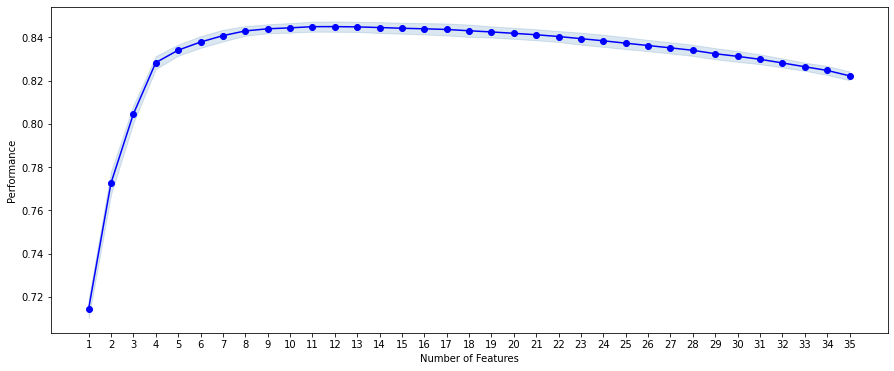

In [13]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [8]:
x_data.columns.values[[values.feature_idx[8]]]

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_23396/1403897289.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_data.columns.values[[values.feature_idx[8]]]


array(['behavioral_antiviral_meds', 'doctor_recc_h1n1', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'age_group', 'employment_occupation'],
      dtype=object)